## 1. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import joblib

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('Data/train.csv', index_col='Id')
test_df = pd.read_csv('Data/test.csv', index_col='Id')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

## 2. Sale Price inspection

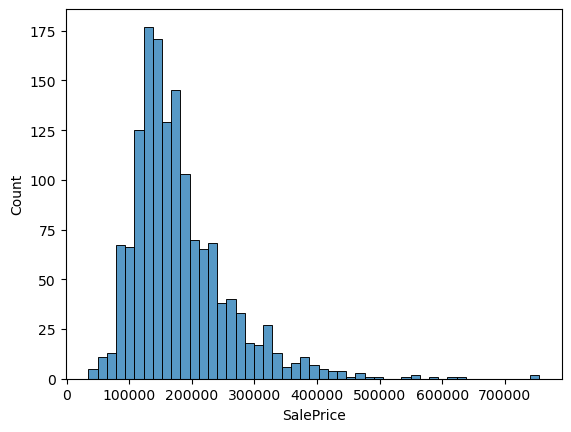

In [5]:
# Hist plot
sns.histplot(train_df['SalePrice']);

In [6]:
# Skewness and Kurtosis
# The data distribution is strongly skewed to the right and has very thick tail

skew = stats.skew(train_df['SalePrice'])
kurt = stats.kurtosis(train_df['SalePrice'])

print(f'Skewness: {skew}')
print(f'Kurtosis: {kurt}')

Skewness: 1.880940746034036
Kurtosis: 6.509812011089439


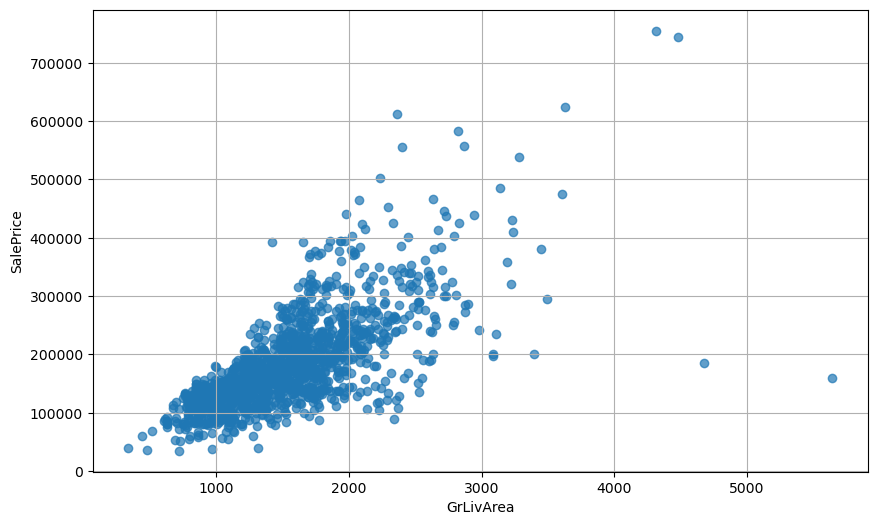

In [7]:
# GrLivArea - Above grade (ground) living area square feet
# Use of helper function
from helper_functions import scatter_plot

scatter_plot(train_df, 'GrLivArea', 'SalePrice')

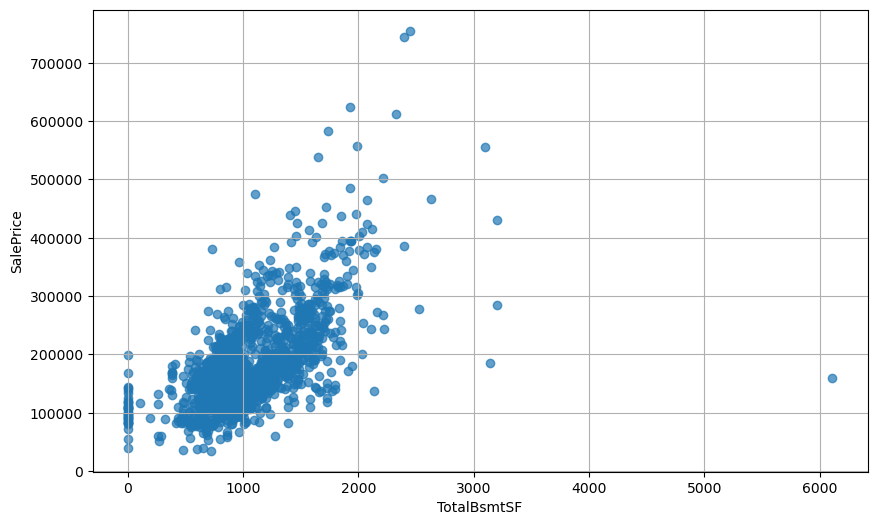

In [8]:
# TotalBsmtSF - Total square feet of basement area
scatter_plot(train_df, 'TotalBsmtSF', 'SalePrice')

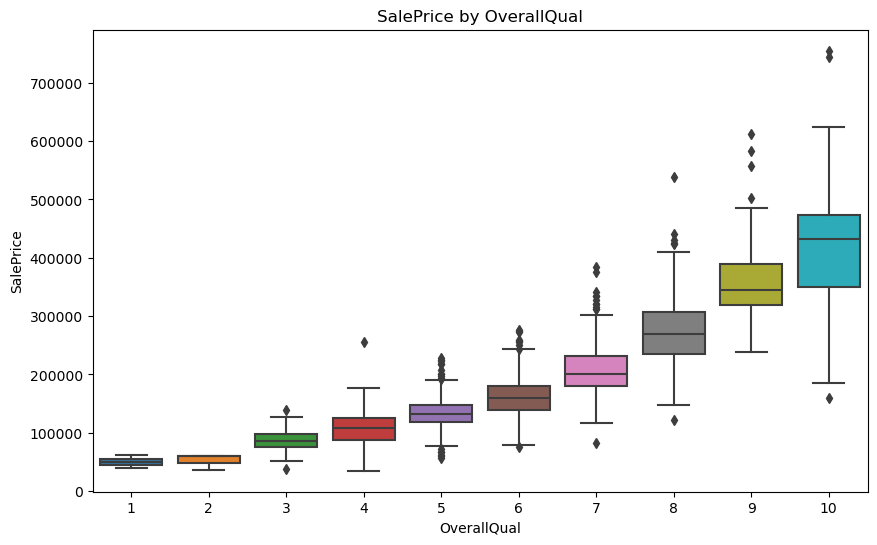

In [9]:
# OverallQuall - Rates the overall material and finish of the house 1-10
from helper_functions import box_plot

# Use the box_plot function
box_plot(train_df, 'OverallQual', 'SalePrice')

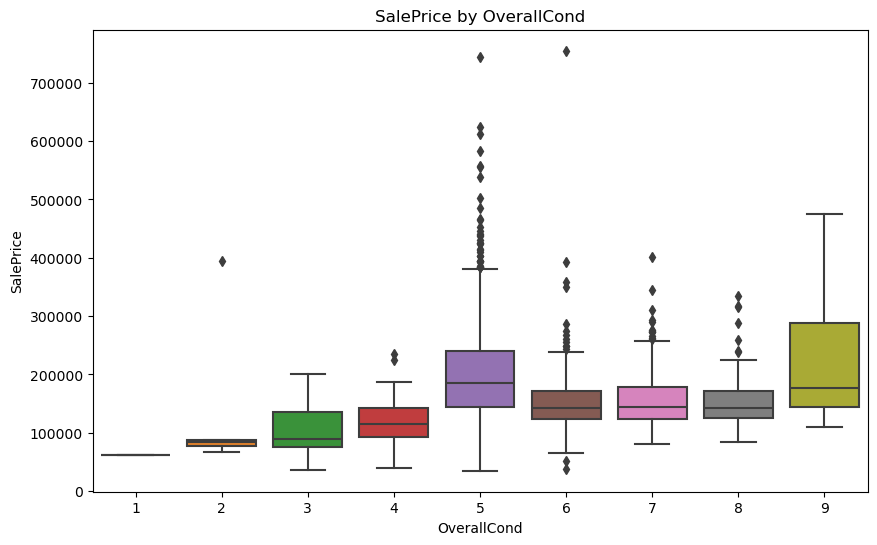

In [10]:
# OverallCond - Rates the overall condition of the house
box_plot(train_df, 'OverallCond', 'SalePrice')

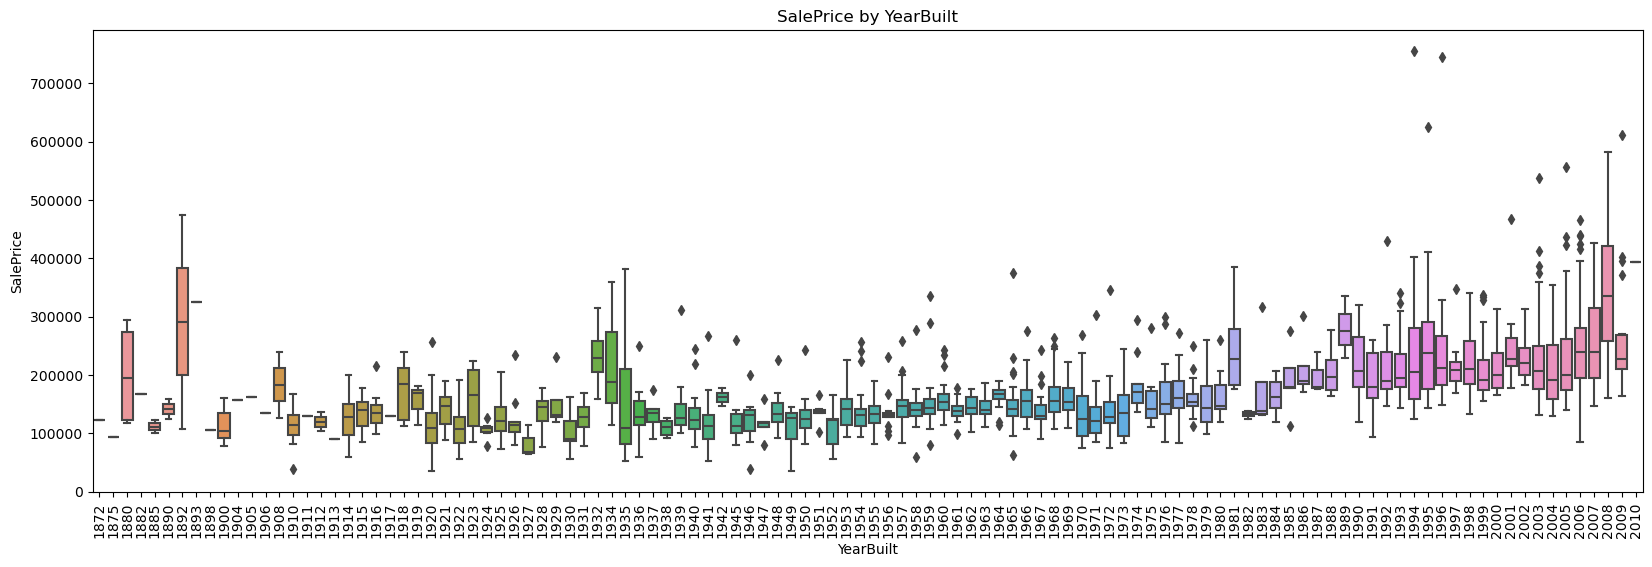

In [11]:
# YearBuilt - Original construction date
box_plot(train_df, 'YearBuilt', 'SalePrice', figsize=(20,6), rotate_xticks=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15516\1828261678.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


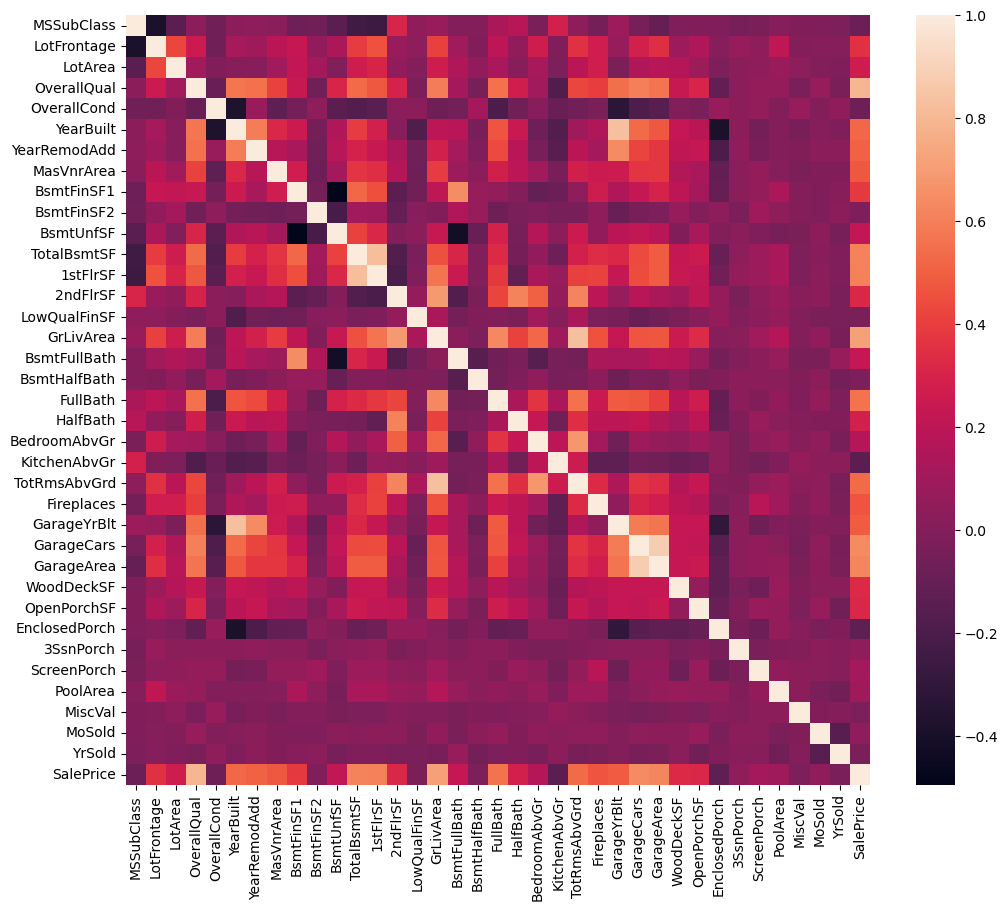

In [12]:
# Correlation matrix

corr = train_df.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr);

In [13]:
# Wybranie 10 najlepszych wartości korelacji z 'SalePrice'
top_6_corr = corr['SalePrice'].sort_values(ascending=False).head(6)

# Wyświetlenie 10 najwyższych korelacji
print("Top 6 Correlations with SalePrice:")
print(top_6_corr)

Top 6 Correlations with SalePrice:
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64


D:\Programy\Anaconda\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


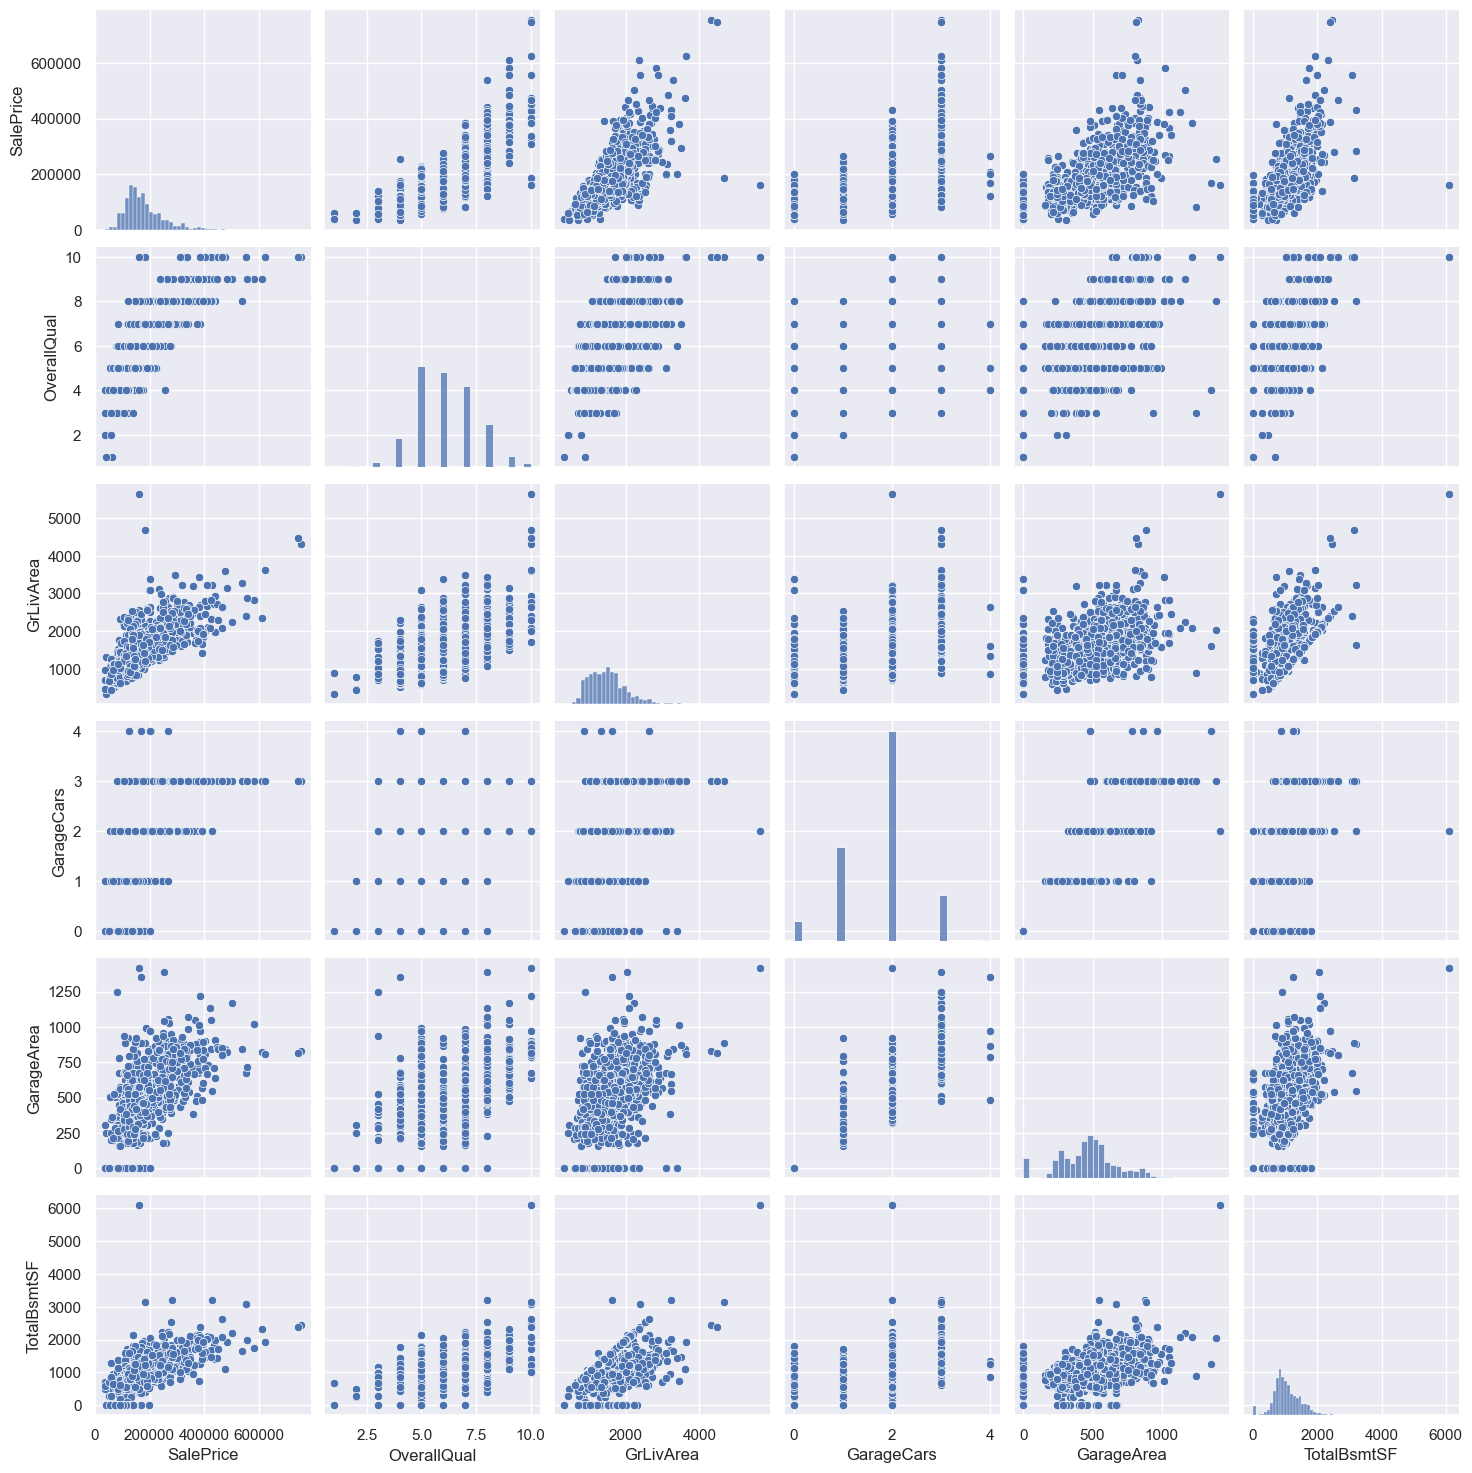

In [14]:
# Pairplot
sns.set()
cols = top_6_corr.index.tolist()
sns.pairplot(train_df[cols], size = 2.5)
plt.show();

## 3. Data processing

### 3.1 Outliers

In [15]:
#Deleting outliers
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index)

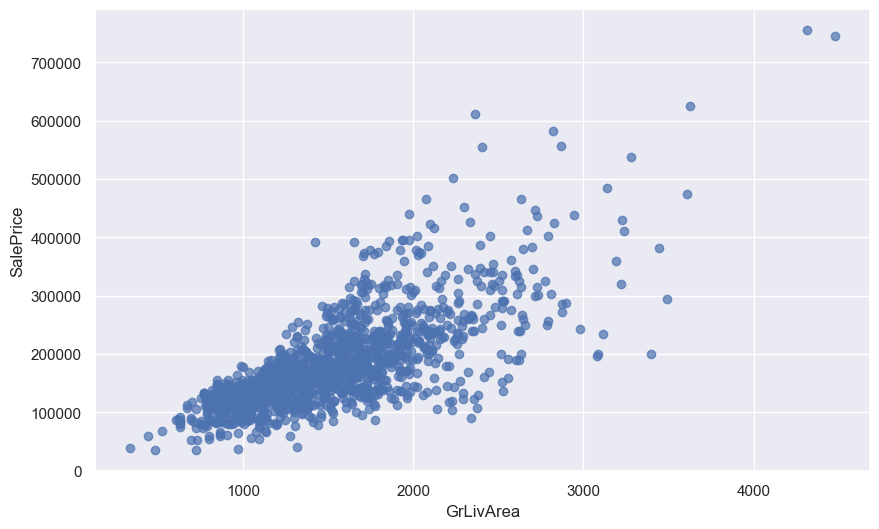

In [16]:
scatter_plot(train_df, 'GrLivArea', 'SalePrice')

### 3.2 Normality of sale price

C:\Users\User\AppData\Local\Temp\ipykernel_15516\30143259.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['SalePrice'], fit=stats.norm)


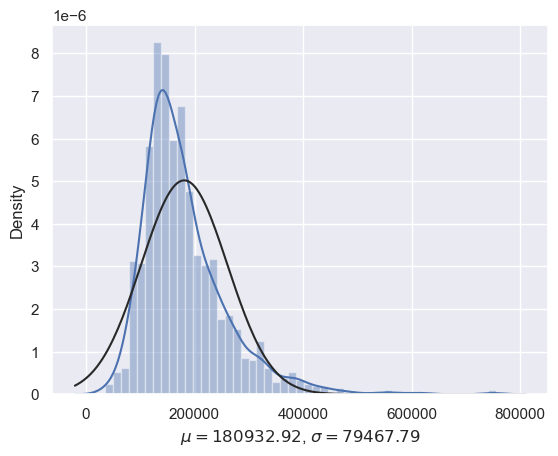

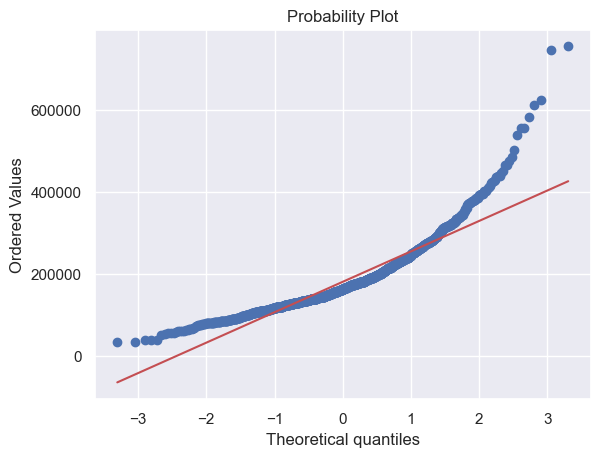

In [17]:
# Histogram and normal probability plot

# Calculate mu (mean) and sigma (standard deviation)
(mu, sigma) = stats.norm.fit(train_df['SalePrice'])

# Histogram with fitted normal distribution
plt.figure()
sns.distplot(train_df['SalePrice'], fit=stats.norm)
plt.xlabel(f'$\mu={mu:.2f}$, $\sigma={sigma:.2f}$')

# Normal probability plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

plt.show()

### 3.3 Scaler transformation

In [18]:
from sklearn.preprocessing import StandardScaler

scaler_y = StandardScaler()
train_df['SalePrice'] = scaler_y.fit_transform(train_df[['SalePrice']])

C:\Users\User\AppData\Local\Temp\ipykernel_15516\3747508640.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['SalePrice'], fit=stats.norm)


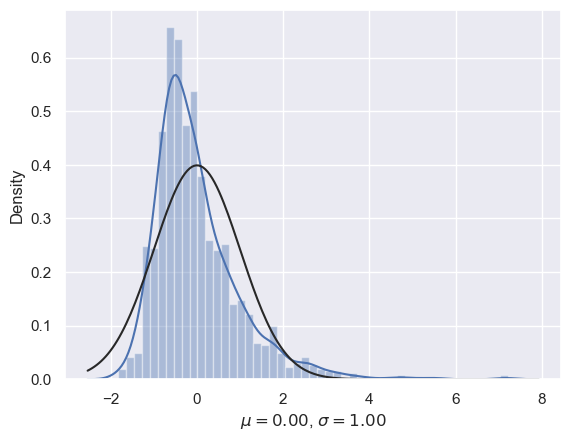

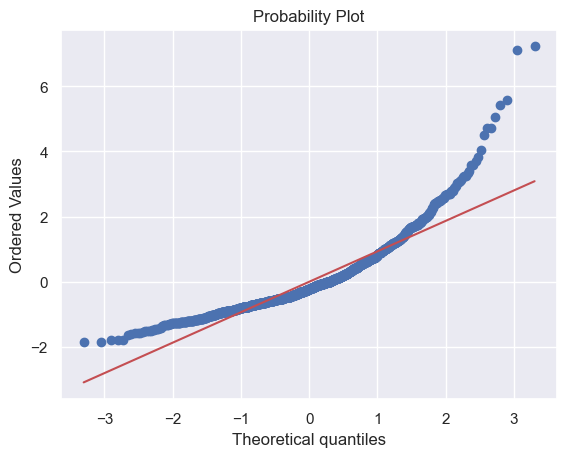

In [19]:
# Calculate mu (mean) and sigma (standard deviation)
(mu, sigma) = stats.norm.fit(train_df['SalePrice'])

# Histogram with fitted normal distribution
plt.figure()
sns.distplot(train_df['SalePrice'], fit=stats.norm)
plt.xlabel(f'$\mu={mu:.2f}$, $\sigma={sigma:.2f}$')

# Normal probability plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

plt.show()

## 4. Feature engineering

In [20]:
train_len = train_df.shape[0]
test_len = test_df.shape[0]

In [21]:
y_train = train_df['SalePrice'].values

all_data = pd.concat((train_df, test_df))
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [22]:
y_train

array([ 0.34689629,  0.00713598,  0.53565201, ...,  1.07675175,
       -0.48834779, -0.42071032])

In [23]:
all_data.shape

(2917, 79)

### 4.1 Missing data

In [24]:
# Calculate missing values and their percentages
missing_total = all_data.isnull().sum()
missing_percent = (all_data.isnull().sum() / all_data.shape[0]) * 100

# Create DataFrame with results
missing_values_table = pd.DataFrame({
    'Total': missing_total,
    'Percent': missing_percent
})

# Filter and sort
missing_values_table = missing_values_table[missing_values_table['Total'] > 0].sort_values(by='Total', ascending=False)

missing_values_table

,Total,Percent
PoolQC,2908,99.691464
MiscFeature,2812,96.400411
Alley,2719,93.212204
Fence,2346,80.425094
FireplaceQu,1420,48.680151
LotFrontage,486,16.660953
GarageFinish,159,5.450806
GarageQual,159,5.450806
GarageCond,159,5.450806
GarageYrBlt,159,5.450806


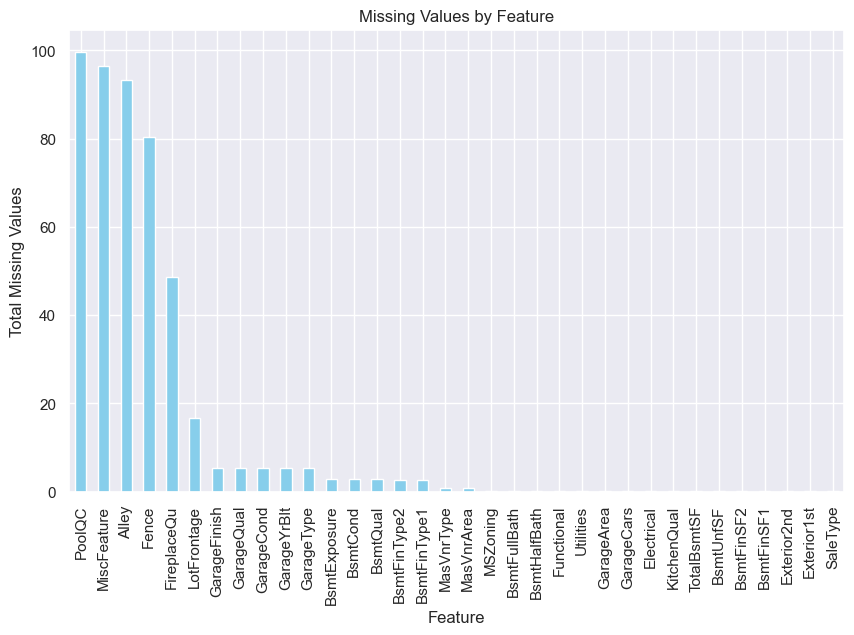

In [25]:
# Bar plot
plt.figure(figsize=(10, 6))
missing_values_table['Percent'].plot(kind='bar', color='skyblue')
plt.title('Missing Values by Feature')
plt.xlabel('Feature')
plt.ylabel('Total Missing Values')
plt.show()

### 4.2 Filling missing values

In [26]:
import pandas as pd

# Assuming 'all_data' is your DataFrame

# Fill missing categorical data with 'None'
for col in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
            'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType', 
            'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2',
            'MasVnrType']:
    all_data[col] = all_data[col].fillna('None')

# Fill missing numerical data with 0
for col in ['GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 
            'GarageCars', 'GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 
            'BsmtFinSF1', 'BsmtFinSF2']:
    all_data[col] = all_data[col].fillna(0)

# Fill LotFrontage with the median value of the neighborhood
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Fill missing data with mode for categorical variables
for col in ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional', 'Utilities']:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [27]:
# Verify that there are no missing values left
print(all_data.isnull().sum().sum())

0


### 4.3 Labels encoding

In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   int64  
 1   MSZoning       2917 non-null   object 
 2   LotFrontage    2917 non-null   float64
 3   LotArea        2917 non-null   int64  
 4   Street         2917 non-null   object 
 5   Alley          2917 non-null   object 
 6   LotShape       2917 non-null   object 
 7   LandContour    2917 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2917 non-null   object 
 10  LandSlope      2917 non-null   object 
 11  Neighborhood   2917 non-null   object 
 12  Condition1     2917 non-null   object 
 13  Condition2     2917 non-null   object 
 14  BldgType       2917 non-null   object 
 15  HouseStyle     2917 non-null   object 
 16  OverallQual    2917 non-null   int64  
 17  OverallCond    2917 non-null   int64  
 18  YearBuil

In [29]:
# Konwersja kolumn do typu kategorii
categorical_columns_to_convert = ['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']

for col in categorical_columns_to_convert:
    all_data[col] = all_data[col].astype('category')

# Potwierdzenie zmian typów danych
all_data.dtypes[categorical_columns_to_convert]

MSSubClass     category
OverallQual    category
OverallCond    category
MoSold         category
YrSold         category
dtype: object

In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Identify categorical and numerical columns
categorical_cols = all_data.select_dtypes(include=['object', 'category']).columns
numerical_cols = all_data.select_dtypes(include=['number']).columns

# Initialize LabelEncoder and StandardScaler
le = LabelEncoder()
scaler = StandardScaler()

# Apply LabelEncoder to categorical columns
for col in categorical_cols:
    all_data[col] = le.fit_transform(all_data[col].astype(str))

# Apply StandardScaler to numerical columns
all_data[numerical_cols] = scaler.fit_transform(all_data[numerical_cols])

In [31]:
# Train/test split
train_data = all_data.iloc[:train_len].copy()
test_data = all_data.iloc[train_len:].copy()

# Add price to training set
train_data.loc[:, 'SalePrice'] = y_train

print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (1458, 80)
Test data shape: (1459, 79)


In [32]:
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,5,2,0.498191,0.189933,1,1,3,3,0,4,...,1.849478,-0.060447,3,2,1,-0.089623,8,4,8,4
1462,5,3,0.545350,0.528788,1,1,0,3,0,0,...,-0.286041,-0.060447,3,4,0,21.936890,8,4,8,4
1463,10,3,0.215233,0.472803,1,1,0,3,0,4,...,-0.286041,-0.060447,3,2,1,-0.089623,5,4,8,4
1464,10,3,0.403871,-0.020682,1,1,0,3,0,4,...,-0.286041,-0.060447,3,4,1,-0.089623,8,4,8,4
1465,0,3,-1.246713,-0.657781,1,1,0,1,0,4,...,2.276582,-0.060447,3,4,1,-0.089623,0,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2,4,-2.284224,-1.050955,1,1,3,3,0,4,...,-0.286041,-0.060447,3,4,1,-0.089623,8,0,8,4
2916,2,4,-2.284224,-1.056336,1,1,3,3,0,4,...,-0.286041,-0.060447,3,4,1,-0.089623,6,0,8,0
2917,5,3,4.270956,1.263252,1,1,3,3,0,4,...,-0.286041,-0.060447,3,4,1,-0.089623,11,0,8,0


In [33]:
from sklearn.model_selection import train_test_split

# Extract labels (SalePrice) from train_data
labels = train_data['SalePrice'].values

# Drop the labels column from train_data to get features
features = train_data.drop(columns=['SalePrice'])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

# Verify the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (1166, 79)
X_val shape: (292, 79)
y_train shape: (1166,)
y_val shape: (292,)


## 5. Models

In [34]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from helper_functions import evaluate_model

### 5.1 Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [1.0, 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=3)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': [1.0, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=3)

In [36]:
print(f"Best parameters: {grid_search.best_params_}")
best_rf = grid_search.best_estimator_

# Save model
joblib.dump(best_rf, 'models/best_random_forest_regressor.pkl')

Best parameters: {'max_depth': 20, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


['models/best_random_forest_regressor.pkl']

Validation RMSE: 22329.069433440407
Validation MAE: 15909.547830798101
Validation R2: 0.9097371558347999


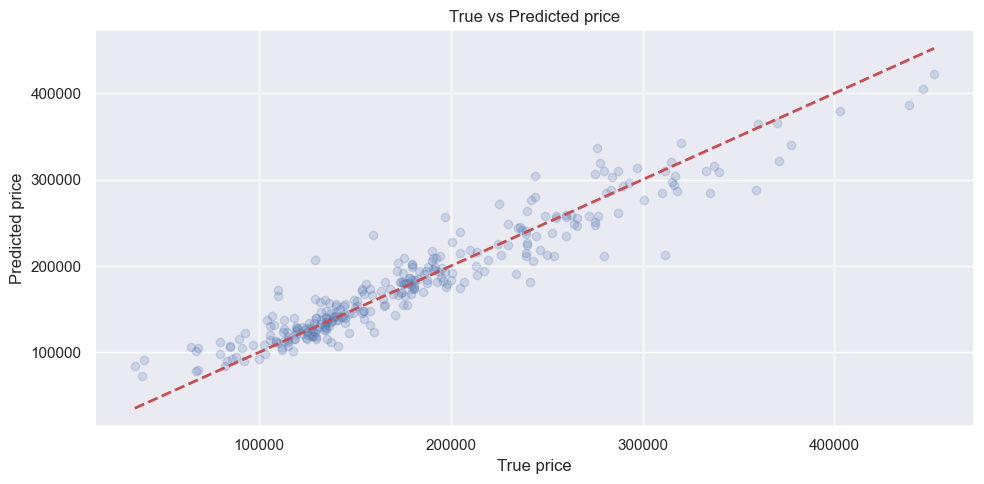

{'Validation RMSE': 22329.069433440407, 'Validation MAE': 15909.547830798101, 'Validation R2': 0.9097371558347999}


In [37]:
# Ewaluacja najlepszego modelu
rf_metrics = evaluate_model(best_rf, X_val, y_val, scaler_y, plot=True)

# Wyświetlenie wyników
print(rf_metrics)

### 5.2 Gradient Boosting Regressor

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2']
}

gb = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=3)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'max_features': [1.0, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=3)

In [39]:
print(f"Best parameters: {grid_search.best_params_}")
best_gb = grid_search.best_estimator_

# Save model
joblib.dump(best_gb, 'models/best_gradient_boosting_regressor.pkl')

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


['models/best_gradient_boosting_regressor.pkl']

Validation RMSE: 20967.85650970614
Validation MAE: 14846.470558259942
Validation R2: 0.9204068234935452


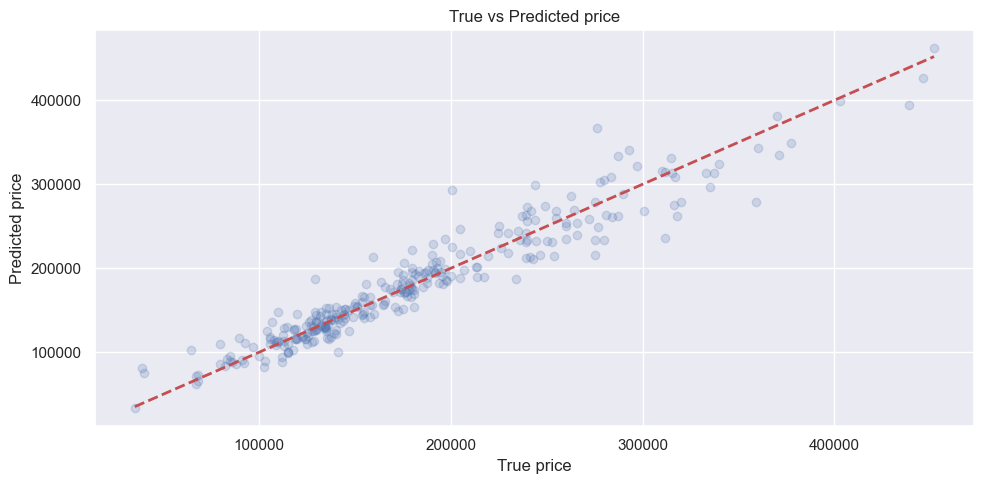

{'Validation RMSE': 20967.85650970614, 'Validation MAE': 14846.470558259942, 'Validation R2': 0.9204068234935452}


In [40]:
gb_metrics = evaluate_model(best_gb, X_val, y_val, scaler_y, plot=True)
print(gb_metrics)

### 5.3 XGBoost

In [41]:
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=3)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=3)

In [42]:
print(f"Best parameters: {grid_search.best_params_}")
best_xgb = grid_search.best_estimator_

joblib.dump(best_xgb, 'models/best_xgboost_regressor.pkl')

Best parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.6}


['models/best_xgboost_regressor.pkl']

Validation RMSE: 22129.43421022902
Validation MAE: 15834.782775042808
Validation R2: 0.9113439482636535


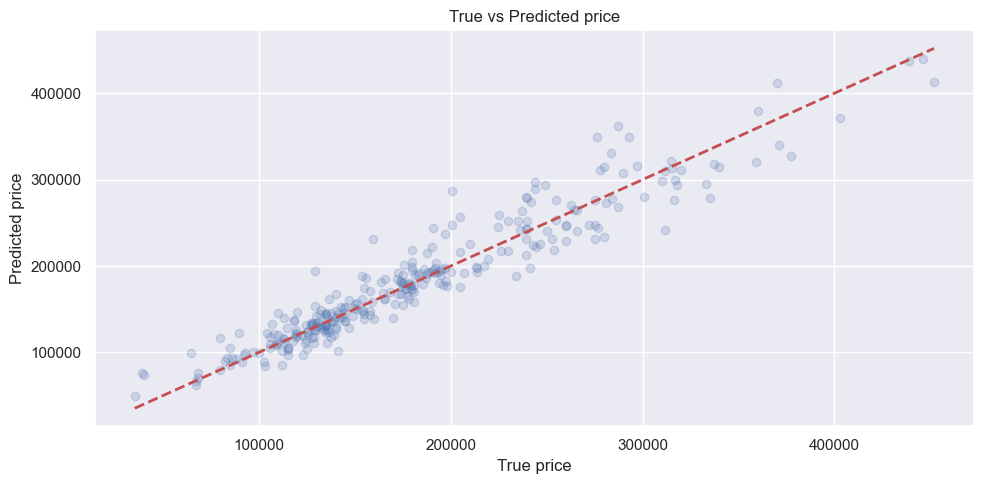

{'Validation RMSE': 22129.43421022902, 'Validation MAE': 15834.782775042808, 'Validation R2': 0.9113439482636535}


In [43]:
xgb_metrics = evaluate_model(best_xgb, X_val, y_val, scaler_y, plot=True)
print(xgb_metrics)

### 5.4 Tensorflow neural network

In [44]:
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.005), loss='mean_squared_error', metrics=['mae'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])



Epoch 1/100


37/37 [==============================] - 2s 8ms/step - loss: 0.8246 - mae: 0.5970 - val_loss: 0.2137 - val_mae: 0.3327
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2313 - mae: 0.3355 - val_loss: 0.1421 - val_mae: 0.2614
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2017 - mae: 0.3135 - val_loss: 0.1358 - val_mae: 0.2626
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1960 - mae: 0.3061 - val_loss: 0.1592 - val_mae: 0.2887
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1873 - mae: 0.3021 - val_loss: 0.1422 - val_mae: 0.2666
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1882 - mae: 0.3030 - val_loss: 0.1149 - val_mae: 0.2511
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1607 - mae: 0.2723 - val_loss: 0.1306 - val_mae: 0.2418
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1880

10/10 [==============================] - 0s 1000us/step
Validation RMSE: 23220.60868415526
Validation MAE: 16491.003143728594
Validation R2: 0.9023853581691493


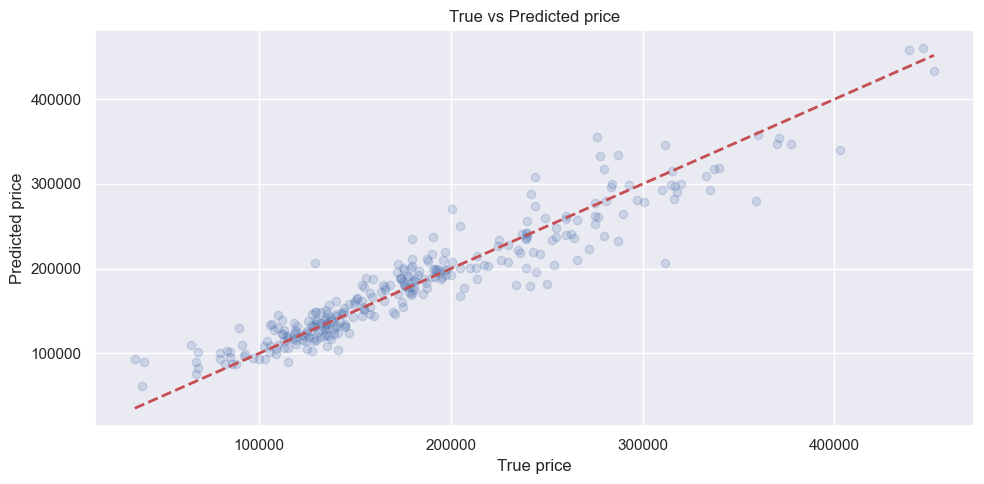

{'Validation RMSE': 23220.60868415526, 'Validation MAE': 16491.003143728594, 'Validation R2': 0.9023853581691493}


In [45]:
nn_metrics = evaluate_model(model, X_val, y_val, scaler_y, plot=True)
print(nn_metrics)

In [46]:
model_path = 'models/best_nn_model'
model.save(model_path)
print(f"Model saved to {model_path}")

INFO:tensorflow:Assets written to: models/best_nn_model\assets


INFO:tensorflow:Assets written to: models/best_nn_model\assets


Model saved to models/best_nn_model


## 6. Model comparision

In [47]:
metrics_df = pd.DataFrame({
    'Random Forest': rf_metrics,
    'Gradient Boosting': gb_metrics,
    'XGBoost': xgb_metrics,
    'Neural Network': nn_metrics
})

metrics_df = metrics_df.T
print(metrics_df)

                   Validation RMSE  Validation MAE  Validation R2
Random Forest         22329.069433    15909.547831       0.909737
Gradient Boosting     20967.856510    14846.470558       0.920407
XGBoost               22129.434210    15834.782775       0.911344
Neural Network        23220.608684    16491.003144       0.902385


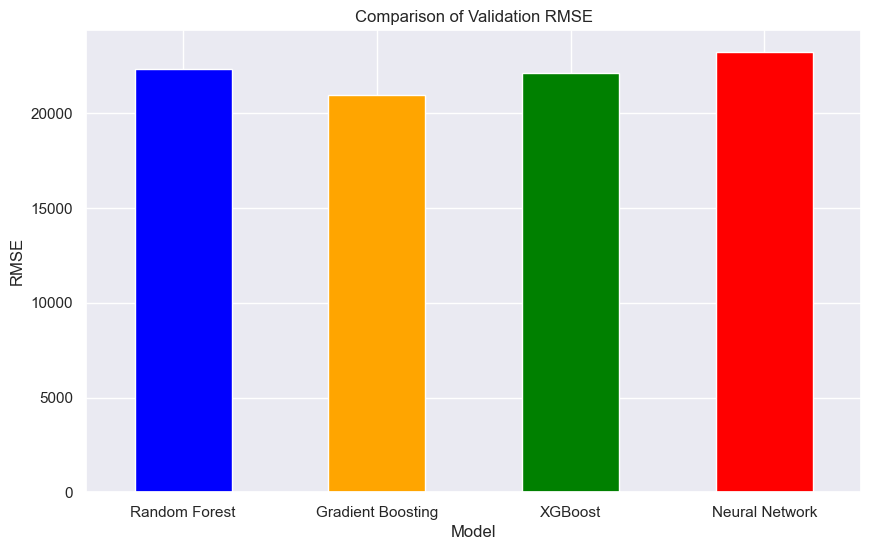

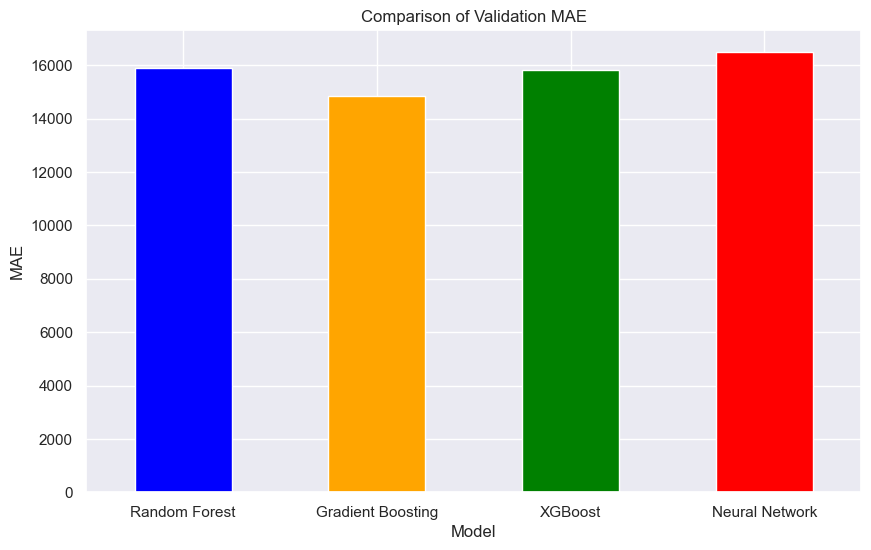

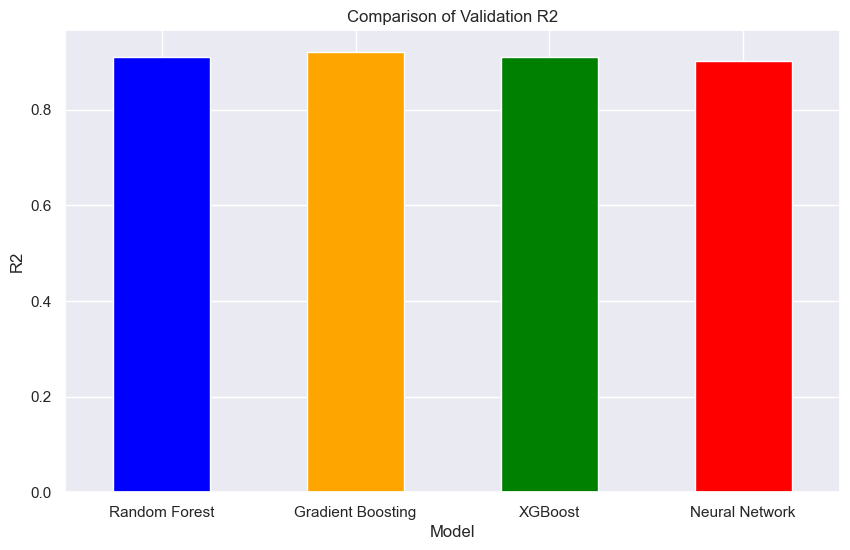

In [48]:
# Barplot dla RMSE
plt.figure(figsize=(10, 6))
metrics_df['Validation RMSE'].plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Comparison of Validation RMSE')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.show()

# Barplot dla MAE
plt.figure(figsize=(10, 6))
metrics_df['Validation MAE'].plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Comparison of Validation MAE')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.show()

# Barplot dla R2
plt.figure(figsize=(10, 6))
metrics_df['Validation R2'].plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Comparison of Validation R2')
plt.ylabel('R2')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.show()

## 7. Stacking model

In [52]:
# Stack model
from sklearn.linear_model import LinearRegression

rf_val_pred = best_rf.predict(X_val)
gb_val_pred = best_gb.predict(X_val)
xgb_val_pred = best_xgb.predict(X_val)
nn_val_pred = model.predict(X_val).flatten()

stacked_features_val = np.column_stack((rf_val_pred, gb_val_pred, xgb_val_pred, nn_val_pred))

meta_learner = LinearRegression()
meta_learner.fit(stacked_features_val, y_val)

stacked_val_pred = meta_learner.predict(stacked_features_val)

stacked_val_metrics = evaluate_model(meta_learner, stacked_features_val, y_val, scaler_y, plot=False)
print(stacked_val_metrics)

10/10 [==============================] - 0s 1ms/step
Validation RMSE: 19920.610091976592
Validation MAE: 14071.970104409718
Validation R2: 0.9281588896975108
{'Validation RMSE': 19920.610091976592, 'Validation MAE': 14071.970104409718, 'Validation R2': 0.9281588896975108}


### 7.1 Final prediction on test dataset

In [53]:
rf_test_pred = best_rf.predict(test_data)
gb_test_pred = best_gb.predict(test_data)
xgb_test_pred = best_xgb.predict(test_data)
nn_test_pred = model.predict(test_data).flatten()

stacked_features_test = np.column_stack((rf_test_pred, gb_test_pred, xgb_test_pred, nn_test_pred))

stacked_test_pred = meta_learner.predict(stacked_features_test)

stacked_test_pred_original = scaler_y.inverse_transform(stacked_test_pred.reshape(-1, 1)).flatten()

46/46 [==============================] - 0s 867us/step


In [54]:
submission = pd.DataFrame({
    'Id': test_data.index,
    'SalePrice': stacked_test_pred_original
})

submission.to_csv('submission.csv', index=False)
print("Predictions saved to submission.csv")

Predictions saved to submission.csv
